In [1]:
# !pip install nba-api
# !pip install Keras

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [92]:
# dependencies

# basic
from datetime import datetime
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import ExcelFile
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.plotting import scatter_matrix
import plotly.express as px
import requests
import seaborn as sns
import time

# nba api
import nba_api
from nba_api.stats.endpoints import BoxScoreDefensive, BoxScoreMiscV2, BoxScorePlayerTrackV2, BoxScoreUsageV2
from nba_api.stats.static import teams
from nba_api.stats.endpoints import LeagueGameFinder, LeagueGameLog, PlayerGameLog

# sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, Normalizer, StandardScaler
from sklearn.svm import SVC

# tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

#save ml models
import joblib

In [4]:
plt.style.use('seaborn')

-------
# csv dataset
-------

In [134]:
# df_final = pd.read_csv('/content/drive/My Drive/mo_bucks_ml/current/gamestatsfinal_version_3.csv')
df_final = pd.read_csv('../resources/gamestatsfinal_version_3.csv')

In [135]:
df_final

,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,BLK.1,CFGA,CFGM,CFG_PCT,...,TS_TEAM_AVG,UFGA,UFGM,UFG_PCT,USG_PCT,VIDEO_AVAILABLE,WL,YEAR BUILT,ARENA,ATTENDANCE
0,0.214,27.3,3.00,3,0,1,0,2,0,0.000,...,0.480333,5,3,0.600,0.163,1,W,1995,TD Garden,18624
1,0.091,11.1,1.00,2,0,2,0,6,2,0.333,...,0.480333,7,3,0.429,0.229,1,W,1995,TD Garden,18624
2,0.000,0.0,0.00,0,0,1,0,5,1,0.200,...,0.480333,7,3,0.429,0.206,1,W,1995,TD Garden,18624
3,0.095,16.7,0.67,2,4,0,4,3,3,1.000,...,0.480333,4,1,0.250,0.137,1,W,1995,TD Garden,18624
4,0.292,28.0,2.33,7,0,1,0,2,1,0.500,...,0.480333,12,1,0.083,0.247,1,W,1995,TD Garden,18624
5,0.000,0.0,0.00,0,0,0,0,1,1,1.000,...,0.480333,11,6,0.545,0.241,1,W,1995,TD Garden,18624
6,0.000,0.0,0.00,0,0,0,0,0,0,0.000,...,0.480333,0,0,0.000,0.000,1,W,1995,TD Garden,18624
7,0.048,8.3,1.00,1,1,0,1,3,0,0.000,...,0.480333,7,5,0.714,0.167,1,W,1995,TD Garden,18624
8,0.176,30.0,1.50,3,0,0,0,0,0,0.000,...,0.480333,4,2,0.500,0.109,1,W,1995,TD Garden,18624
9,0.250,13.0,3.00,3,0,0,0,5,2,0.400,...,0.480333,12,7,0.583,0.290,1,W,1995,TD Garden,18624


In [136]:
# fix gameid column w/ leading zeros
df_final['GAME_ID'] = df_final['GAME_ID'].map(lambda x: f'{x:0>10}')

In [137]:
df_final.head()

,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,BLK.1,CFGA,CFGM,CFG_PCT,...,TS_TEAM_AVG,UFGA,UFGM,UFG_PCT,USG_PCT,VIDEO_AVAILABLE,WL,YEAR BUILT,ARENA,ATTENDANCE
0,0.214,27.3,3.00,3,0,1,0,2,0,0.000,...,0.480333,5,3,0.600,0.163,1,W,1995,TD Garden,18624
1,0.091,11.1,1.00,2,0,2,0,6,2,0.333,...,0.480333,7,3,0.429,0.229,1,W,1995,TD Garden,18624
2,0.000,0.0,0.00,0,0,1,0,5,1,0.200,...,0.480333,7,3,0.429,0.206,1,W,1995,TD Garden,18624
3,0.095,16.7,0.67,2,4,0,4,3,3,1.000,...,0.480333,4,1,0.250,0.137,1,W,1995,TD Garden,18624
4,0.292,28.0,2.33,7,0,1,0,2,1,0.500,...,0.480333,12,1,0.083,0.247,1,W,1995,TD Garden,18624


# player selection

In [138]:
# dfplayerawards = pd.read_csv('/content/drive/My Drive/mo_bucks_ml/current/2019_nba_awards.csv')
dfplayerawards = pd.read_csv('../resources/2019_nba_awards.csv')

In [139]:
players_awarded = dfplayerawards['Player'].unique()

In [140]:
df_final_awarded = df_final.loc[df_final['PLAYER_NAME'].isin(players_awarded)]

# feature selection

In [141]:
list(df_final.keys())

['AST_PCT',
 'AST_RATIO',
 'AST_TOV',
 'AST',
 'BLK',
 'BLKA',
 'BLK.1',
 'CFGA',
 'CFGM',
 'CFG_PCT',
 'COMMENT',
 'Capacity',
 'Capacity_pct',
 'City',
 'DEF_RATING',
 'DFGA',
 'DFGM',
 'DFG_PCT',
 'DIST',
 'DRBC',
 'DREB_PCT',
 'DREB',
 'EFG_EVAL',
 'EFG_PCT',
 'EFG_TEAM_AVG',
 'E_DEF_RATING',
 'E_NET_RATING',
 'E_OFF_RATING',
 'E_PACE',
 'E_USG_PCT',
 'FG3A',
 'FG3M',
 'FG3_PCT',
 'FGA',
 'FGM',
 'FG_PCT',
 'FTA',
 'FTAST',
 'FTM',
 'FT_PCT',
 'FT_missed',
 'GAME_DATE',
 'GAME_ID',
 'GAMESCORE',
 'Home/Away',
 'Hometeam',
 'MATCHUP',
 'MATCHUP_AST',
 'MATCHUP_FG3A',
 'MATCHUP_FG3M',
 'MATCHUP_FG3_PCT',
 'MATCHUP_FGA',
 'MATCHUP_FGM',
 'MATCHUP_FG_PCT',
 'MATCHUP_MIN',
 'MATCHUP_TOV',
 'MIN',
 'MIN_FLAT',
 'NET_RATING',
 'OFF_RATING',
 'OPP_PTS_2ND_CHANCE',
 'OPP_PTS_FB',
 'OPP_PTS_OFF_TOV',
 'OPP_PTS_PAINT',
 'ORBC',
 'OREB',
 'OREB_PCT',
 'PACE',
 'PACE_PER40',
 'PARTIAL_POSS',
 'PASS',
 'PCT_AST',
 'PCT_BLK',
 'PCT_BLKA',
 'PCT_DREB',
 'PCT_FG3A',
 'PCT_FG3M',
 'PCT_FGA',
 'PCT_F

In [142]:
features = [
    
#   target
    'WL',
    
#   traditional
    'PTS',
    'AST',
    'PF',
#   'DEF_RATING',
#   'OFF_RATING',
    'FG_PCT',
    'FG3M',
    'FTM',
    'FGM',
    'STL',
    'TOV',
    'Home/Away',
    
#   minutes/usage/possession
    'MIN_FLAT',
    'USG_PCT',
    'POSS',
    
#   point types
    'PTS_2ND_CHANCE',
    'PTS_FB',
    'PTS_OFF_TOV',
    'PTS_PAINT',

#   advanced
    'GAMESCORE',
    'EFG_PCT',
    'TS_PCT',
#   eval => pct above or below team average
    'EFG_EVAL',
    'TS_EVAL',
#   team average
    'EFG_TEAM_AVG',
    'TS_TEAM_AVG',
    
#   granular
    'SPD', # speed
    'DIST', # distance
    'ORBC', # oreb chances
    'DRBC', # dreb chances
    'RBC', # reb chances
    'TCHS', # touches
    'SAST', # secondary assists
    'FTAST', # free throw assists
    'PFD', # personal fouls drawn
    'PASS', # passes
    'CFGM', # contested fgm
    'CFGA', # contested fga
    'CFG_PCT', # contested fg pct
    'UFGM', # uncontested fgm
    'UFGA', # uncontested fga
    'UFG_PCT', # uncontested fg pct
    'DFGM', # defended fgm
    'DFGA', # defended fga
    'DFG_PCT', # defended df pct
    
#   percent of team stats
    'PCT_FGM',
    'PCT_FGA',
    'PCT_FG3M',
    'PCT_FG3A',
    'PCT_FTM',
    'PCT_FTA',
    'PCT_OREB',
    'PCT_DREB',
    'PCT_REB',
    'PCT_AST',
    'PCT_TOV',
    'PCT_STL',
    'PCT_BLK',
    'PCT_BLKA',
    'PCT_PF',
    'PCT_PFD',
    'PCT_PTS',
    
#     arena
#    'Capacity_pct',
#    'Capacity',
    
]

In [143]:
len(features)

61

--------
# svc model
--------

In [144]:
df_svc = df_final[features].copy()

In [145]:
df_svc.head()

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,W,8,3,3,0.429,2,0,3,0,1,...,0.077,0.211,0.375,0.167,0.000,0.0,0.500,0.375,0.444,0.190
1,W,12,2,4,0.385,1,1,5,0,2,...,0.083,0.172,0.105,0.286,0.000,0.0,0.667,0.364,0.077,0.171
2,W,10,0,1,0.333,1,1,4,4,0,...,0.143,0.172,0.000,0.000,0.667,0.0,0.500,0.111,0.385,0.192
3,W,9,2,1,0.571,0,1,4,0,3,...,0.138,0.121,0.118,0.300,0.000,1.0,0.000,0.091,0.143,0.134
4,W,7,7,1,0.143,1,2,2,0,3,...,0.154,0.129,0.389,0.333,0.000,0.0,0.250,0.077,0.143,0.103


In [146]:
encoder = LabelEncoder()
encoder.fit(df_svc['WL'])
y = encoder.transform(df_svc.WL)
df_svc['y'] = y

In [147]:
encoder = LabelEncoder()
encoder.fit(df_svc['Home/Away'])
home = encoder.transform(df_svc['Home/Away'])
df_svc['HOME'] = home

In [148]:
df_svc

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,y,HOME
0,W,8,3,3,0.429,2,0,3,0,1,...,0.375,0.167,0.000,0.000,0.500,0.375,0.444,0.190,1,1
1,W,12,2,4,0.385,1,1,5,0,2,...,0.105,0.286,0.000,0.000,0.667,0.364,0.077,0.171,1,1
2,W,10,0,1,0.333,1,1,4,4,0,...,0.000,0.000,0.667,0.000,0.500,0.111,0.385,0.192,1,1
3,W,9,2,1,0.571,0,1,4,0,3,...,0.118,0.300,0.000,1.000,0.000,0.091,0.143,0.134,1,1
4,W,7,7,1,0.143,1,2,2,0,3,...,0.389,0.333,0.000,0.000,0.250,0.077,0.143,0.103,1,1
5,W,16,0,5,0.583,2,0,7,2,1,...,0.000,0.200,0.667,0.000,0.000,0.500,0.143,0.327,1,1
6,W,0,0,0,0.000,0,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,1
7,W,11,1,0,0.500,1,0,5,0,1,...,0.143,0.167,0.000,0.333,0.000,0.000,0.111,0.180,1,1
8,W,7,3,2,0.500,2,1,2,0,2,...,0.429,0.200,0.000,0.000,0.000,0.182,0.125,0.152,1,1
9,W,23,3,2,0.529,1,4,9,1,1,...,0.300,0.091,0.250,0.000,0.000,0.167,0.231,0.426,1,1


In [149]:
target = df_svc['y']
data = df_svc.drop(['WL', 'y', 'Home/Away'], axis=1)
feature_names = data.columns

In [150]:
data

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
0,8,3,3,0.429,2,0,3,0,1,19,...,0.211,0.375,0.167,0.000,0.000,0.500,0.375,0.444,0.190,1
1,12,2,4,0.385,1,1,5,0,2,28,...,0.172,0.105,0.286,0.000,0.000,0.667,0.364,0.077,0.171,1
2,10,0,1,0.333,1,1,4,4,0,25,...,0.172,0.000,0.000,0.667,0.000,0.500,0.111,0.385,0.192,1
3,9,2,1,0.571,0,1,4,0,3,30,...,0.121,0.118,0.300,0.000,1.000,0.000,0.091,0.143,0.134,1
4,7,7,1,0.143,1,2,2,0,3,29,...,0.129,0.389,0.333,0.000,0.000,0.250,0.077,0.143,0.103,1
5,16,0,5,0.583,2,0,7,2,1,21,...,0.455,0.000,0.200,0.667,0.000,0.000,0.500,0.143,0.327,1
6,0,0,0,0.000,0,0,0,0,0,1,...,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
7,11,1,0,0.500,1,0,5,0,1,27,...,0.250,0.143,0.167,0.000,0.333,0.000,0.000,0.111,0.180,1
8,7,3,2,0.500,2,1,2,0,2,25,...,0.091,0.429,0.200,0.000,0.000,0.000,0.182,0.125,0.152,1
9,23,3,2,0.529,1,4,9,1,1,29,...,0.300,0.300,0.091,0.250,0.000,0.000,0.167,0.231,0.426,1


In [151]:
# X_train, X_test, y_train, y_test = train_test_split(data[:5000], target[:5000], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [152]:
y_train.head()

13443    1
6311     0
12709    1
14408    1
11633    0
Name: y, dtype: int64

In [153]:
y_test.head()

20252    0
20634    0
516      1
2250     0
5354     1
Name: y, dtype: int64

In [154]:
X_test

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
20252,25,3,3,0.643,2,5,9,0,2,37,...,0.100,0.214,0.286,0.000,0.000,0.500,0.136,0.200,0.298,0
20634,7,1,0,0.182,1,2,2,0,2,20,...,0.179,0.250,0.250,0.000,0.000,1.000,0.000,0.375,0.233,1
516,10,2,3,0.500,2,0,4,0,1,23,...,0.042,0.182,0.143,0.000,0.000,0.000,0.231,0.000,0.204,0
2250,19,9,3,0.615,2,1,8,1,7,34,...,0.125,0.450,0.467,0.200,0.000,0.000,0.200,0.059,0.218,1
5354,4,1,0,0.400,0,0,2,0,2,21,...,0.182,0.091,0.400,0.000,0.000,0.333,0.000,0.000,0.078,0
12136,0,0,0,0.000,0,0,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
4903,12,1,1,0.800,3,1,4,1,3,17,...,0.333,0.100,0.333,1.000,0.500,0.000,0.250,0.125,0.267,1
2992,14,0,4,0.600,2,0,6,0,3,28,...,0.438,0.000,0.188,0.000,1.000,0.500,0.364,0.154,0.212,0
6239,4,0,0,1.000,0,0,2,0,0,4,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0
16791,10,0,1,0.400,0,2,4,0,3,21,...,0.381,0.000,0.429,0.000,0.000,0.200,0.111,0.125,0.270,0


In [155]:
model = SVC(C= 5, 
        gamma= 0.01, 
        kernel= 'rbf',
        verbose=True)

In [156]:
model.fit(X_train, y_train)

[LibSVM]

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [157]:
predictions_svc = model.predict(X_test)

In [29]:
joblib.dump(model, 'model_wl_svc.sav')

['model_wl_svc.sav']

In [158]:
loaded_model = joblib.load('model_wl_svc.sav')
result = loaded_model.score(X_test, y_test)
print(result)

0.5844017094017094


In [159]:
X_test['predictions_svc'] = predictions_svc
X_test['target'] = target

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [160]:
X_test

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,predictions_svc,target
20252,25,3,3,0.643,2,5,9,0,2,37,...,0.286,0.000,0.000,0.500,0.136,0.200,0.298,0,1,0
20634,7,1,0,0.182,1,2,2,0,2,20,...,0.250,0.000,0.000,1.000,0.000,0.375,0.233,1,0,0
516,10,2,3,0.500,2,0,4,0,1,23,...,0.143,0.000,0.000,0.000,0.231,0.000,0.204,0,1,1
2250,19,9,3,0.615,2,1,8,1,7,34,...,0.467,0.200,0.000,0.000,0.200,0.059,0.218,1,0,0
5354,4,1,0,0.400,0,0,2,0,2,21,...,0.400,0.000,0.000,0.333,0.000,0.000,0.078,0,1,1
12136,0,0,0,0.000,0,0,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,1,1
4903,12,1,1,0.800,3,1,4,1,3,17,...,0.333,1.000,0.500,0.000,0.250,0.125,0.267,1,0,0
2992,14,0,4,0.600,2,0,6,0,3,28,...,0.188,0.000,1.000,0.500,0.364,0.154,0.212,0,0,1
6239,4,0,0,1.000,0,0,2,0,0,4,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0,0,1
16791,10,0,1,0.400,0,2,4,0,3,21,...,0.429,0.000,0.000,0.200,0.111,0.125,0.270,0,1,0


In [161]:
print(classification_report(y_test, predictions_svc, target_names=['Loss','Win']))

              precision    recall  f1-score   support

        Loss       0.57      0.58      0.57      2725
         Win       0.60      0.59      0.59      2891

    accuracy                           0.58      5616
   macro avg       0.58      0.58      0.58      5616
weighted avg       0.58      0.58      0.58      5616



In [162]:
list(features)

['WL',
 'PTS',
 'AST',
 'PF',
 'FG_PCT',
 'FG3M',
 'FTM',
 'FGM',
 'STL',
 'TOV',
 'Home/Away',
 'MIN_FLAT',
 'USG_PCT',
 'POSS',
 'PTS_2ND_CHANCE',
 'PTS_FB',
 'PTS_OFF_TOV',
 'PTS_PAINT',
 'GAMESCORE',
 'EFG_PCT',
 'TS_PCT',
 'EFG_EVAL',
 'TS_EVAL',
 'EFG_TEAM_AVG',
 'TS_TEAM_AVG',
 'SPD',
 'DIST',
 'ORBC',
 'DRBC',
 'RBC',
 'TCHS',
 'SAST',
 'FTAST',
 'PFD',
 'PASS',
 'CFGM',
 'CFGA',
 'CFG_PCT',
 'UFGM',
 'UFGA',
 'UFG_PCT',
 'DFGM',
 'DFGA',
 'DFG_PCT',
 'PCT_FGM',
 'PCT_FGA',
 'PCT_FG3M',
 'PCT_FG3A',
 'PCT_FTM',
 'PCT_FTA',
 'PCT_OREB',
 'PCT_DREB',
 'PCT_REB',
 'PCT_AST',
 'PCT_TOV',
 'PCT_STL',
 'PCT_BLK',
 'PCT_BLKA',
 'PCT_PF',
 'PCT_PFD',
 'PCT_PTS']

In [163]:
dfpred = pd.concat([df_final, X_test], axis=1)

In [164]:
dfplayerpred = dfpred[['PLAYER_NAME', 'TEAM_NICKNAME', 'MATCHUP', 'predictions_svc', 'target', 'WL']].copy().dropna()

In [165]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,predictions_svc,target,WL
3,Al Horford,Celtics,BOS vs. PHI,1.0,1.0,W
6,Semi Ojeleye,Celtics,BOS vs. PHI,1.0,1.0,W
17,T.J. McConnell,76ers,PHI @ BOS,0.0,0.0,L
19,Dario Saric,76ers,PHI @ BOS,0.0,0.0,L
31,Klay Thompson,Warriors,GSW vs. OKC,0.0,1.0,W
34,Terrance Ferguson,Thunder,OKC @ GSW,1.0,0.0,L
35,Paul George,Thunder,OKC @ GSW,0.0,0.0,L
41,Eric Bledsoe,Bucks,MIL @ CHA,0.0,1.0,W
42,Malcolm Brogdon,Bucks,MIL @ CHA,1.0,1.0,W
44,Donte DiVincenzo,Bucks,MIL @ CHA,1.0,1.0,W


In [166]:
dfplayerpred['correct_svc'] = 0

In [167]:
for index, row in dfplayerpred.iterrows():
    
    if row['predictions_svc'] == row['target']:
        dfplayerpred.loc[index, 'correct_svc'] = 'correct'
    if row['predictions_svc'] != row['target']:
        dfplayerpred.loc[index, 'correct_svc'] = 'wrong'

In [168]:
dfplayerpred.loc[(dfplayerpred['correct_svc'] == 'correct')]

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,predictions_svc,target,WL,correct_svc
3,Al Horford,Celtics,BOS vs. PHI,1.0,1.0,W,correct
6,Semi Ojeleye,Celtics,BOS vs. PHI,1.0,1.0,W,correct
17,T.J. McConnell,76ers,PHI @ BOS,0.0,0.0,L,correct
19,Dario Saric,76ers,PHI @ BOS,0.0,0.0,L,correct
35,Paul George,Thunder,OKC @ GSW,0.0,0.0,L,correct
42,Malcolm Brogdon,Bucks,MIL @ CHA,1.0,1.0,W,correct
44,Donte DiVincenzo,Bucks,MIL @ CHA,1.0,1.0,W,correct
46,Ersan Ilyasova,Bucks,MIL @ CHA,1.0,1.0,W,correct
47,Brook Lopez,Bucks,MIL @ CHA,1.0,1.0,W,correct
72,Blake Griffin,Pistons,DET vs. BKN,1.0,1.0,W,correct


## grid

In [169]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [170]:
model = SVC()

# param_grid = {'C': [0.001, 0.1, 1, 5, 10, 100],
#               'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
#               'kernel':['rbf']}

param_grid = {'C': [0.1, 1, 5],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel':['rbf']}

grid = GridSearchCV(model, param_grid, verbose=3)

In [171]:
grid.fit(X_train, y_train)

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.580, total=  13.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.583, total=  16.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.3s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.583, total=  17.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.552, total=  17.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.547, total=  16.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.549, total=  16.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.505, total=  16.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.505, total=  16.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.505, total=  17.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 13.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [172]:
grid.best_params_

{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}

In [173]:
grid.best_score_

0.631366496497685

In [174]:
predictions_grid = grid.predict(X_test)

In [175]:
predictions_grid

array([0, 0, 0, ..., 1, 1, 1])

In [176]:
joblib.dump(grid, 'model_wl_svcgrid.sav')

['model_wl_svcgrid.sav']

In [177]:
loaded_model = joblib.load('model_wl_svcgrid.sav')
result = loaded_model.score(X_test, y_test)
print(result)

0.6490384615384616


In [178]:
X_test['predictions_grid'] = predictions_grid
X_test['target'] = target

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [179]:
print(classification_report(y_test, predictions_grid,
                            target_names=["loss", "win"]))

              precision    recall  f1-score   support

        loss       0.63      0.65      0.64      2725
         win       0.66      0.65      0.65      2891

    accuracy                           0.65      5616
   macro avg       0.65      0.65      0.65      5616
weighted avg       0.65      0.65      0.65      5616



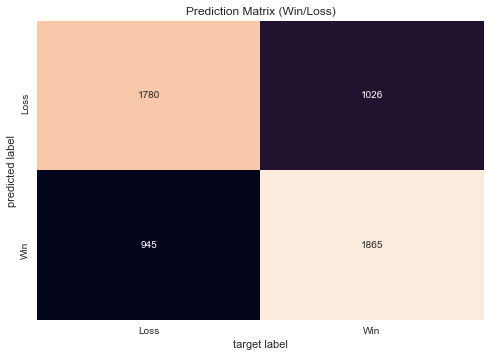

In [180]:
matrix = confusion_matrix(y_test, predictions_grid)
sns.heatmap(matrix.T, annot=True, fmt='d', cbar=False,
            xticklabels=['Loss', 'Win'],
            yticklabels=['Loss', 'Win'])
plt.xlabel('target label')
plt.ylabel('predicted label')
plt.title('Prediction Matrix (Win/Loss)')
plt.savefig('matrix_wl.png', dpi=600)

In [181]:
matrix.T

array([[1780, 1026],
       [ 945, 1865]])

In [182]:
dfpred = pd.concat([df_final, X_test], axis=1)

In [183]:
dfpred

,AST_PCT,AST_RATIO,AST_TOV,AST,BLK,BLKA,BLK.1,CFGA,CFGM,CFG_PCT,...,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,predictions_grid,target
0,0.214,27.3,3.00,3,0,1,0,2,0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.091,11.1,1.00,2,0,2,0,6,2,0.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000,0.0,0.00,0,0,1,0,5,1,0.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.095,16.7,0.67,2,4,0,4,3,3,1.000,...,0.300,0.0,1.0,0.000,0.091,0.143,0.134,1.0,1.0,1.0
4,0.292,28.0,2.33,7,0,1,0,2,1,0.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000,0.0,0.00,0,0,0,0,1,1,1.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000,0.0,0.00,0,0,0,0,0,0,0.000,...,0.000,0.0,0.0,0.000,0.000,0.000,0.000,1.0,1.0,1.0
7,0.048,8.3,1.00,1,1,0,1,3,0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.176,30.0,1.50,3,0,0,0,0,0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.250,13.0,3.00,3,0,0,0,5,2,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
dfplayerpred = dfpred[['PLAYER_NAME', 'TEAM_NICKNAME', 'MATCHUP', 'predictions_grid', 'target', 'WL']].copy().dropna()

In [185]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,predictions_grid,target,WL
3,Al Horford,Celtics,BOS vs. PHI,1.0,1.0,W
6,Semi Ojeleye,Celtics,BOS vs. PHI,1.0,1.0,W
17,T.J. McConnell,76ers,PHI @ BOS,0.0,0.0,L
19,Dario Saric,76ers,PHI @ BOS,0.0,0.0,L
31,Klay Thompson,Warriors,GSW vs. OKC,0.0,1.0,W
34,Terrance Ferguson,Thunder,OKC @ GSW,0.0,0.0,L
35,Paul George,Thunder,OKC @ GSW,0.0,0.0,L
41,Eric Bledsoe,Bucks,MIL @ CHA,0.0,1.0,W
42,Malcolm Brogdon,Bucks,MIL @ CHA,0.0,1.0,W
44,Donte DiVincenzo,Bucks,MIL @ CHA,1.0,1.0,W


In [186]:
dfplayerpred['correct_grid'] = 0
dfplayerpred['wrong_grid'] = 0

In [187]:
for index, row in dfplayerpred.iterrows():
    
    if row[3] == row['target']:
        dfplayerpred.loc[index, 'correct_grid'] = 1
        
    if row[3] != row['target']:
        dfplayerpred.loc[index, 'wrong_grid'] = 1

    print(index, row[6])

3 0
6 0
17 0
19 0
31 0
34 0
35 0
41 0
42 0
44 0
46 0
47 0
49 0
50 0
54 0
57 0
59 0
72 0
83 0
88 0
90 0
101 0
103 0
115 0
119 0
123 0
127 0
128 0
129 0
133 0
134 0
137 0
139 0
140 0
169 0
177 0
180 0
194 0
196 0
199 0
200 0
205 0
208 0
210 0
217 0
218 0
221 0
230 0
231 0
239 0
247 0
251 0
257 0
259 0
263 0
265 0
273 0
274 0
278 0
283 0
285 0
286 0
290 0
291 0
293 0
300 0
308 0
311 0
313 0
315 0
322 0
323 0
326 0
327 0
335 0
339 0
341 0
344 0
345 0
346 0
351 0
353 0
360 0
361 0
367 0
369 0
379 0
383 0
385 0
387 0
396 0
397 0
399 0
401 0
407 0
408 0
409 0
410 0
411 0
423 0
424 0
426 0
431 0
433 0
438 0
447 0
450 0
451 0
457 0
459 0
460 0
466 0
467 0
471 0
474 0
476 0
478 0
482 0
484 0
485 0
487 0
491 0
499 0
503 0
505 0
509 0
512 0
513 0
516 0
520 0
538 0
547 0
549 0
553 0
554 0
558 0
563 0
575 0
576 0
580 0
584 0
585 0
586 0
592 0
601 0
606 0
608 0
610 0
621 0
631 0
635 0
640 0
643 0
644 0
647 0
649 0
651 0
655 0
657 0
664 0
668 0
674 0
688 0
695 0
696 0
697 0
705 0
707 0
708 0
714 0
715

5474 0
5477 0
5478 0
5483 0
5485 0
5496 0
5500 0
5503 0
5504 0
5505 0
5508 0
5512 0
5513 0
5514 0
5523 0
5525 0
5527 0
5528 0
5532 0
5533 0
5535 0
5545 0
5547 0
5548 0
5549 0
5550 0
5557 0
5561 0
5564 0
5567 0
5570 0
5572 0
5575 0
5576 0
5584 0
5589 0
5593 0
5597 0
5598 0
5601 0
5610 0
5617 0
5621 0
5627 0
5635 0
5638 0
5647 0
5653 0
5654 0
5657 0
5658 0
5662 0
5663 0
5665 0
5671 0
5673 0
5678 0
5683 0
5687 0
5701 0
5705 0
5709 0
5711 0
5714 0
5716 0
5719 0
5727 0
5732 0
5736 0
5742 0
5743 0
5746 0
5748 0
5749 0
5751 0
5754 0
5762 0
5770 0
5771 0
5784 0
5787 0
5792 0
5800 0
5802 0
5804 0
5811 0
5814 0
5815 0
5826 0
5833 0
5841 0
5843 0
5846 0
5847 0
5848 0
5849 0
5852 0
5853 0
5857 0
5859 0
5862 0
5863 0
5864 0
5865 0
5871 0
5885 0
5887 0
5888 0
5893 0
5900 0
5908 0
5910 0
5915 0
5916 0
5921 0
5923 0
5925 0
5928 0
5929 0
5934 0
5937 0
5940 0
5945 0
5948 0
5953 0
5954 0
5960 0
5970 0
5971 0
5975 0
5979 0
5980 0
5982 0
5990 0
5992 0
5995 0
5998 0
5999 0
6002 0
6003 0
6013 0
6015 0
6020 0

10843 0
10852 0
10855 0
10856 0
10857 0
10861 0
10868 0
10869 0
10876 0
10877 0
10879 0
10881 0
10882 0
10883 0
10884 0
10885 0
10897 0
10901 0
10903 0
10904 0
10908 0
10909 0
10911 0
10914 0
10915 0
10924 0
10927 0
10930 0
10934 0
10935 0
10941 0
10943 0
10946 0
10949 0
10953 0
10957 0
10963 0
10977 0
10978 0
10982 0
10984 0
10989 0
10990 0
10992 0
10994 0
10999 0
11000 0
11006 0
11010 0
11011 0
11013 0
11015 0
11018 0
11021 0
11025 0
11029 0
11031 0
11043 0
11056 0
11062 0
11063 0
11072 0
11075 0
11076 0
11078 0
11081 0
11082 0
11090 0
11097 0
11098 0
11103 0
11107 0
11118 0
11124 0
11132 0
11140 0
11143 0
11145 0
11146 0
11147 0
11148 0
11150 0
11153 0
11158 0
11159 0
11175 0
11176 0
11178 0
11180 0
11183 0
11184 0
11187 0
11191 0
11192 0
11195 0
11198 0
11203 0
11206 0
11212 0
11214 0
11217 0
11222 0
11225 0
11227 0
11229 0
11230 0
11235 0
11243 0
11247 0
11253 0
11257 0
11259 0
11262 0
11277 0
11282 0
11285 0
11289 0
11293 0
11297 0
11301 0
11304 0
11305 0
11313 0
11315 0
11321 0


15182 0
15185 0
15186 0
15188 0
15191 0
15192 0
15196 0
15197 0
15199 0
15204 0
15205 0
15211 0
15217 0
15218 0
15219 0
15221 0
15224 0
15227 0
15231 0
15232 0
15237 0
15238 0
15243 0
15247 0
15248 0
15270 0
15276 0
15277 0
15278 0
15280 0
15288 0
15289 0
15291 0
15292 0
15295 0
15296 0
15297 0
15298 0
15301 0
15314 0
15318 0
15319 0
15320 0
15331 0
15336 0
15337 0
15342 0
15344 0
15347 0
15348 0
15353 0
15354 0
15356 0
15362 0
15367 0
15371 0
15377 0
15382 0
15383 0
15388 0
15390 0
15391 0
15399 0
15400 0
15401 0
15404 0
15410 0
15411 0
15412 0
15414 0
15420 0
15421 0
15423 0
15426 0
15427 0
15437 0
15439 0
15446 0
15448 0
15450 0
15453 0
15456 0
15465 0
15466 0
15473 0
15484 0
15486 0
15491 0
15497 0
15503 0
15506 0
15508 0
15510 0
15526 0
15531 0
15533 0
15537 0
15541 0
15544 0
15545 0
15547 0
15550 0
15551 0
15558 0
15561 0
15565 0
15569 0
15570 0
15590 0
15593 0
15595 0
15607 0
15610 0
15616 0
15624 0
15626 0
15628 0
15634 0
15642 0
15645 0
15651 0
15652 0
15654 0
15673 0
15678 0


19468 0
19479 0
19484 0
19493 0
19495 0
19502 0
19505 0
19507 0
19512 0
19516 0
19521 0
19525 0
19526 0
19529 0
19532 0
19533 0
19535 0
19542 0
19545 0
19552 0
19556 0
19557 0
19560 0
19569 0
19570 0
19571 0
19572 0
19575 0
19579 0
19587 0
19588 0
19589 0
19591 0
19592 0
19593 0
19594 0
19595 0
19597 0
19598 0
19604 0
19612 0
19613 0
19617 0
19624 0
19628 0
19629 0
19630 0
19633 0
19644 0
19645 0
19647 0
19648 0
19653 0
19661 0
19662 0
19665 0
19666 0
19667 0
19668 0
19676 0
19677 0
19678 0
19683 0
19685 0
19687 0
19690 0
19693 0
19700 0
19707 0
19709 0
19717 0
19718 0
19721 0
19724 0
19728 0
19730 0
19734 0
19735 0
19741 0
19744 0
19748 0
19754 0
19759 0
19761 0
19764 0
19765 0
19766 0
19773 0
19774 0
19775 0
19779 0
19783 0
19785 0
19788 0
19793 0
19795 0
19796 0
19798 0
19801 0
19805 0
19807 0
19809 0
19824 0
19829 0
19841 0
19843 0
19845 0
19847 0
19848 0
19852 0
19857 0
19858 0
19863 0
19865 0
19868 0
19869 0
19872 0
19875 0
19883 0
19888 0
19892 0
19896 0
19898 0
19905 0
19906 0


In [60]:
dfplayerpred

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,predictions_grid,target,WL,correct_grid,wrong_grid
3,Al Horford,Celtics,BOS vs. PHI,1.0,1.0,W,1,0
6,Semi Ojeleye,Celtics,BOS vs. PHI,1.0,1.0,W,1,0
17,T.J. McConnell,76ers,PHI @ BOS,0.0,0.0,L,1,0
19,Dario Saric,76ers,PHI @ BOS,0.0,0.0,L,1,0
31,Klay Thompson,Warriors,GSW vs. OKC,0.0,1.0,W,0,1
34,Terrance Ferguson,Thunder,OKC @ GSW,0.0,0.0,L,1,0
35,Paul George,Thunder,OKC @ GSW,0.0,0.0,L,1,0
41,Eric Bledsoe,Bucks,MIL @ CHA,0.0,1.0,W,0,1
42,Malcolm Brogdon,Bucks,MIL @ CHA,0.0,1.0,W,0,1
44,Donte DiVincenzo,Bucks,MIL @ CHA,1.0,1.0,W,1,0


In [61]:
groupbygrid = dfplayerpred.groupby(by='PLAYER_NAME').sum()[['correct_grid', 'wrong_grid']].copy()

In [62]:
df = pd.DataFrame(groupbygrid)
df['differential_grid'] = 0
df['correct_grid_pct'] = 0
df['wrong_grid_pct'] = 0

In [63]:
for index, row in df.iterrows():
    differential = (row['correct_grid'] - row['wrong_grid']) / (row['correct_grid'] + row['wrong_grid'])
    df.loc[index, 'differential_grid'] = differential
    
    correct_pct = (row['correct_grid']) / (row['correct_grid'] + row['wrong_grid'])
    df.loc[index, 'correct_grid_pct'] = correct_pct

    wrong_pct = (row['wrong_grid']) / (row['correct_grid'] + row['wrong_grid'])
    df.loc[index, 'wrong_grid_pct'] = wrong_pct


In [64]:
df.sort_values(by='correct_grid_pct').tail(20)

,correct_grid,wrong_grid,differential_grid,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,,
De'Aaron Fox,9,1,0.800000,0.900000,0.100000
Seth Curry,21,2,0.826087,0.913043,0.086957
Semi Ojeleye,14,1,0.866667,0.933333,0.066667
Miles Bridges,15,1,0.875000,0.937500,0.062500
Maxi Kleber,18,1,0.894737,0.947368,0.052632
Amile Jefferson,6,0,1.000000,1.000000,0.000000
Brandon Goodwin,7,0,1.000000,1.000000,0.000000
BJ Johnson,1,0,1.000000,1.000000,0.000000
Dwight Howard,1,0,1.000000,1.000000,0.000000


In [65]:
df.sort_values(by='wrong_grid_pct').head(20)

,correct_grid,wrong_grid,differential_grid,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,,
Zhaire Smith,2,0,1.000000,1.000000,0.000000
Patrick McCaw,5,0,1.000000,1.000000,0.000000
Chimezie Metu,8,0,1.000000,1.000000,0.000000
Justin Patton,2,0,1.000000,1.000000,0.000000
Brandon Goodwin,7,0,1.000000,1.000000,0.000000
Dillon Brooks,3,0,1.000000,1.000000,0.000000
BJ Johnson,1,0,1.000000,1.000000,0.000000
Shake Milton,4,0,1.000000,1.000000,0.000000
Amile Jefferson,6,0,1.000000,1.000000,0.000000


----------
# neural net
----------

In [66]:
df_nnet = df_final[features]

In [67]:
data = df_nnet.copy()

In [68]:
data.head()

,WL,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,...,PCT_DREB,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS
0,W,8,3,3,0.429,2,0,3,0,1,...,0.077,0.211,0.375,0.167,0.000,0.0,0.500,0.375,0.444,0.190
1,W,12,2,4,0.385,1,1,5,0,2,...,0.083,0.172,0.105,0.286,0.000,0.0,0.667,0.364,0.077,0.171
2,W,10,0,1,0.333,1,1,4,4,0,...,0.143,0.172,0.000,0.000,0.667,0.0,0.500,0.111,0.385,0.192
3,W,9,2,1,0.571,0,1,4,0,3,...,0.138,0.121,0.118,0.300,0.000,1.0,0.000,0.091,0.143,0.134
4,W,7,7,1,0.143,1,2,2,0,3,...,0.154,0.129,0.389,0.333,0.000,0.0,0.250,0.077,0.143,0.103


In [69]:
encoder = LabelEncoder()
encoder.fit(data['WL'])
encoder.classes_
y = encoder.transform(data.WL)
y

array([1, 1, 1, ..., 0, 0, 0])

In [70]:
encoder = LabelEncoder()
encoder.fit(data['Home/Away'])
home = encoder.transform(data['Home/Away'])
data['HOME'] = home

In [71]:
data.drop(columns=['WL','Home/Away'], inplace=True)
# X = data.values
X = data
X

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
0,8,3,3,0.429,2,0,3,0,1,19,...,0.211,0.375,0.167,0.000,0.000,0.500,0.375,0.444,0.190,1
1,12,2,4,0.385,1,1,5,0,2,28,...,0.172,0.105,0.286,0.000,0.000,0.667,0.364,0.077,0.171,1
2,10,0,1,0.333,1,1,4,4,0,25,...,0.172,0.000,0.000,0.667,0.000,0.500,0.111,0.385,0.192,1
3,9,2,1,0.571,0,1,4,0,3,30,...,0.121,0.118,0.300,0.000,1.000,0.000,0.091,0.143,0.134,1
4,7,7,1,0.143,1,2,2,0,3,29,...,0.129,0.389,0.333,0.000,0.000,0.250,0.077,0.143,0.103,1
5,16,0,5,0.583,2,0,7,2,1,21,...,0.455,0.000,0.200,0.667,0.000,0.000,0.500,0.143,0.327,1
6,0,0,0,0.000,0,0,0,0,0,1,...,0.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1
7,11,1,0,0.500,1,0,5,0,1,27,...,0.250,0.143,0.167,0.000,0.333,0.000,0.000,0.111,0.180,1
8,7,3,2,0.500,2,1,2,0,2,25,...,0.091,0.429,0.200,0.000,0.000,0.000,0.182,0.125,0.152,1
9,23,3,2,0.529,1,4,9,1,1,29,...,0.300,0.300,0.091,0.250,0.000,0.000,0.167,0.231,0.426,1


In [72]:
len(y), len(X)

(22462, 22462)

In [73]:
y_categorical = to_categorical(y)
y_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=42)

In [75]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [76]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [77]:
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [78]:
X_train_scaled[0]

array([0.06557377, 0.        , 0.        , 0.667     , 0.        ,
       0.        , 0.1       , 0.        , 0.        , 0.21428571,
       0.12      , 0.21367521, 0.        , 0.        , 0.        ,
       0.11111111, 0.21122112, 0.44466667, 0.44466667, 0.44572269,
       0.45770942, 0.57817597, 0.59067664, 0.66512346, 0.20794393,
       0.09090909, 0.13793103, 0.15384615, 0.10447761, 0.        ,
       0.        , 0.05555556, 0.11340206, 0.0625    , 0.04      ,
       1.        , 0.05882353, 0.07407407, 0.5       , 0.        ,
       0.10526316, 0.        , 0.25      , 0.158     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.111     ,
       0.111     , 0.        , 0.        , 0.        , 0.667     ,
       0.        , 0.        , 0.25      , 0.2       , 1.        ])

In [79]:
y_train_scaled[0]

array([0., 1.], dtype=float32)

In [80]:
X_train_scaled.shape, y_train_scaled.shape

((16846, 60), (16846, 2))

In [81]:
model = Sequential(name='NBA_Model')

# input layer
model.add(Dense(units=50, activation='relu', input_dim=X_train_scaled.shape[1], kernel_initializer='he_normal'))

# hidden layers
model.add(Dense(units=100, activation='relu'))
# model.add(Dense(units=100, activation='relu'))
# model.add(Dense(units=75, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))

# output layer
# model.add(Dense(units=y_train.shape[1], activation='sigmoid'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

In [82]:
model.summary()

Model: "NBA_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 52        
Total params: 14,527
Trainable params: 14,527
Non-trainable params: 0
_________________________________________________________________


In [83]:
optimizer_sgd = SGD(lr = 0.01, 
                    momentum = 0.9)

In [84]:
model.compile(
#     optimizer='adam',
    optimizer=optimizer_sgd,
    loss='binary_crossentropy',
#     loss='categorical_crossentropy',
    # loss='categorical_hinge',
    metrics=['accuracy']
)

In [85]:
model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=50,
    shuffle=True,
    verbose=2,
    validation_data=[X_test_scaled, y_test_scaled]
)

Train on 16846 samples, validate on 5616 samples
Epoch 1/50
16846/16846 - 1s - loss: 0.6484 - accuracy: 0.6179 - val_loss: 0.6246 - val_accuracy: 0.6496
Epoch 2/50
16846/16846 - 1s - loss: 0.6158 - accuracy: 0.6606 - val_loss: 0.6081 - val_accuracy: 0.6743
Epoch 3/50
16846/16846 - 1s - loss: 0.6077 - accuracy: 0.6691 - val_loss: 0.6130 - val_accuracy: 0.6592
Epoch 4/50
16846/16846 - 1s - loss: 0.6025 - accuracy: 0.6740 - val_loss: 0.6076 - val_accuracy: 0.6663
Epoch 5/50
16846/16846 - 1s - loss: 0.5996 - accuracy: 0.6749 - val_loss: 0.6004 - val_accuracy: 0.6752
Epoch 6/50
16846/16846 - 1s - loss: 0.5961 - accuracy: 0.6777 - val_loss: 0.6052 - val_accuracy: 0.6741
Epoch 7/50
16846/16846 - 1s - loss: 0.5963 - accuracy: 0.6774 - val_loss: 0.5966 - val_accuracy: 0.6816
Epoch 8/50
16846/16846 - 1s - loss: 0.5934 - accuracy: 0.6827 - val_loss: 0.6027 - val_accuracy: 0.6690
Epoch 9/50
16846/16846 - 1s - loss: 0.5918 - accuracy: 0.6828 - val_loss: 0.6234 - val_accuracy: 0.6562
Epoch 10/50
168

In [86]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_scaled, verbose=2)
print(f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

5616/1 - 0s - loss: 0.6678 - accuracy: 0.6836
Neural Network - Loss: 0.5964234907742579, Accuracy: 0.683582603931427


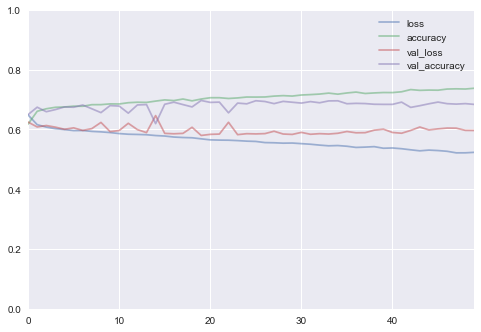

In [87]:
pd.DataFrame(model.history.history).plot(alpha=.5)
plt.gca().set_ylim(0,1)
plt.show()

In [88]:
predictions_nnet = model.predict(X_test_scaled)
predictions_nnet

array([[0.71712226, 0.28287777],
       [0.69918185, 0.30081812],
       [0.7282032 , 0.27179682],
       ...,
       [0.29417512, 0.7058248 ],
       [0.05111871, 0.9488813 ],
       [0.5441389 , 0.45586106]], dtype=float32)

In [90]:
model.save('model_wl_nnet.h5')

In [95]:
loaded_model = load_model('model_wl_nnet.h5')
result = loaded_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(result)

5616/1 - 0s - loss: 0.6678 - accuracy: 0.6836
[0.5964234907742579, 0.6835826]


In [96]:
# add predictions to df here and merge with grid pred df
X_test['nnet_pred_loss_0'] = predictions_nnet[:,0]
X_test['nnet_pred_win_1'] = predictions_nnet[:,1]
X_test['WL_TARGET'] = y_test[:,1]

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/andrew/anaconda3/envs/bootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [97]:
X_test

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET
20252,25,3,3,0.643,2,5,9,0,2,37,...,0.000,0.000,0.500,0.136,0.200,0.298,0,0.717122,0.282878,0.0
20634,7,1,0,0.182,1,2,2,0,2,20,...,0.000,0.000,1.000,0.000,0.375,0.233,1,0.699182,0.300818,0.0
516,10,2,3,0.500,2,0,4,0,1,23,...,0.000,0.000,0.000,0.231,0.000,0.204,0,0.728203,0.271797,1.0
2250,19,9,3,0.615,2,1,8,1,7,34,...,0.200,0.000,0.000,0.200,0.059,0.218,1,0.486656,0.513344,0.0
5354,4,1,0,0.400,0,0,2,0,2,21,...,0.000,0.000,0.333,0.000,0.000,0.078,0,0.630689,0.369311,1.0
12136,0,0,0,0.000,0,0,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,1,0.379690,0.620310,1.0
4903,12,1,1,0.800,3,1,4,1,3,17,...,1.000,0.500,0.000,0.250,0.125,0.267,1,0.531986,0.468014,0.0
2992,14,0,4,0.600,2,0,6,0,3,28,...,0.000,1.000,0.500,0.364,0.154,0.212,0,0.615995,0.384005,1.0
6239,4,0,0,1.000,0,0,2,0,0,4,...,0.000,0.000,0.000,0.000,0.000,1.000,0,0.993719,0.006281,1.0
16791,10,0,1,0.400,0,2,4,0,3,21,...,0.000,0.000,0.200,0.111,0.125,0.270,0,0.838313,0.161687,0.0


In [98]:
dfprednnet = pd.concat(
    [df_final, X_test], axis=1)[['PLAYER_NAME', 
                                         'TEAM_NICKNAME', 
                                         'MATCHUP',
                                         'GAME_DATE',
                                         'nnet_pred_loss_0', 
                                         'nnet_pred_win_1', 
                                         'WL_TARGET', 
                                         'WL']].copy().dropna()

In [99]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,GAME_DATE,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL
3,Al Horford,Celtics,BOS vs. PHI,16-Oct-18,0.533324,0.466676,1.0,W
6,Semi Ojeleye,Celtics,BOS vs. PHI,16-Oct-18,0.365469,0.634531,1.0,W
17,T.J. McConnell,76ers,PHI @ BOS,16-Oct-18,0.924291,0.075709,0.0,L
19,Dario Saric,76ers,PHI @ BOS,16-Oct-18,0.847836,0.152164,0.0,L
31,Klay Thompson,Warriors,GSW vs. OKC,16-Oct-18,0.843887,0.156113,1.0,W
34,Terrance Ferguson,Thunder,OKC @ GSW,16-Oct-18,0.778880,0.221120,0.0,L
35,Paul George,Thunder,OKC @ GSW,16-Oct-18,0.907893,0.092107,0.0,L
41,Eric Bledsoe,Bucks,MIL @ CHA,17-Oct-18,0.598693,0.401307,1.0,W
42,Malcolm Brogdon,Bucks,MIL @ CHA,17-Oct-18,0.653229,0.346771,1.0,W
44,Donte DiVincenzo,Bucks,MIL @ CHA,17-Oct-18,0.389447,0.610553,1.0,W


In [100]:
dfprednnet['nnet_eval'] = 0
dfprednnet['nnet_total'] = 1

In [101]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,GAME_DATE,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL,nnet_eval,nnet_total
3,Al Horford,Celtics,BOS vs. PHI,16-Oct-18,0.533324,0.466676,1.0,W,0,1
6,Semi Ojeleye,Celtics,BOS vs. PHI,16-Oct-18,0.365469,0.634531,1.0,W,0,1
17,T.J. McConnell,76ers,PHI @ BOS,16-Oct-18,0.924291,0.075709,0.0,L,0,1
19,Dario Saric,76ers,PHI @ BOS,16-Oct-18,0.847836,0.152164,0.0,L,0,1
31,Klay Thompson,Warriors,GSW vs. OKC,16-Oct-18,0.843887,0.156113,1.0,W,0,1
34,Terrance Ferguson,Thunder,OKC @ GSW,16-Oct-18,0.778880,0.221120,0.0,L,0,1
35,Paul George,Thunder,OKC @ GSW,16-Oct-18,0.907893,0.092107,0.0,L,0,1
41,Eric Bledsoe,Bucks,MIL @ CHA,17-Oct-18,0.598693,0.401307,1.0,W,0,1
42,Malcolm Brogdon,Bucks,MIL @ CHA,17-Oct-18,0.653229,0.346771,1.0,W,0,1
44,Donte DiVincenzo,Bucks,MIL @ CHA,17-Oct-18,0.389447,0.610553,1.0,W,0,1


In [102]:
for index, row in dfprednnet.iterrows():
    
    if dfprednnet.loc[index, 'nnet_pred_loss_0'] > 0.5 and row['WL_TARGET'] == 0.0:
        dfprednnet.loc[index, 'nnet_eval'] = 1
    
    if dfprednnet.loc[index, 'nnet_pred_win_1'] > 0.5 and row['WL_TARGET'] == 1.0:
        dfprednnet.loc[index, 'nnet_eval'] = 1


In [103]:
dfprednnet

,PLAYER_NAME,TEAM_NICKNAME,MATCHUP,GAME_DATE,nnet_pred_loss_0,nnet_pred_win_1,WL_TARGET,WL,nnet_eval,nnet_total
3,Al Horford,Celtics,BOS vs. PHI,16-Oct-18,0.533324,0.466676,1.0,W,0,1
6,Semi Ojeleye,Celtics,BOS vs. PHI,16-Oct-18,0.365469,0.634531,1.0,W,1,1
17,T.J. McConnell,76ers,PHI @ BOS,16-Oct-18,0.924291,0.075709,0.0,L,1,1
19,Dario Saric,76ers,PHI @ BOS,16-Oct-18,0.847836,0.152164,0.0,L,1,1
31,Klay Thompson,Warriors,GSW vs. OKC,16-Oct-18,0.843887,0.156113,1.0,W,0,1
34,Terrance Ferguson,Thunder,OKC @ GSW,16-Oct-18,0.778880,0.221120,0.0,L,1,1
35,Paul George,Thunder,OKC @ GSW,16-Oct-18,0.907893,0.092107,0.0,L,1,1
41,Eric Bledsoe,Bucks,MIL @ CHA,17-Oct-18,0.598693,0.401307,1.0,W,0,1
42,Malcolm Brogdon,Bucks,MIL @ CHA,17-Oct-18,0.653229,0.346771,1.0,W,0,1
44,Donte DiVincenzo,Bucks,MIL @ CHA,17-Oct-18,0.389447,0.610553,1.0,W,1,1


In [104]:
dfprednnet['nnet_eval'].value_counts() / len(dfprednnet['nnet_eval'])

1    0.683583
0    0.316417
Name: nnet_eval, dtype: float64

In [105]:
len(dfprednnet['nnet_eval'])

5616

In [106]:
groupbynnet = dfprednnet.groupby(by='PLAYER_NAME').sum()[['nnet_eval','nnet_total']].copy()

In [107]:
groupbynnet

,nnet_eval,nnet_total
PLAYER_NAME,,
Aaron Gordon,12,18
Aaron Holiday,5,9
Abdel Nader,6,14
Al Horford,13,17
Al-Farouq Aminu,13,16
Alec Burks,8,13
Alex Caruso,8,9
Alex Len,8,12
Alfonzo McKinnie,7,13


In [108]:
dfnnet = pd.DataFrame(groupbynnet)
dfnnet['differential_nnet'] = 0
dfnnet['nnet_wrong'] = 0
dfnnet['nnet_wrong_pct'] = 0
dfnnet['nnet_correct_pct'] = 0

for index, row in dfnnet.iterrows():
    
    total_nnet = row['nnet_total']
    
    correct_nnet = row['nnet_eval']
    
    wrong_nnet = total_nnet - correct_nnet
    dfnnet.loc[index, 'nnet_wrong'] = wrong_nnet
    
    differential_nnet = (correct_nnet - wrong_nnet) / total_nnet
    dfnnet.loc[index, 'differential_nnet'] = differential_nnet
    
    correct_pct = correct_nnet / total_nnet
    dfnnet.loc[index, 'nnet_correct_pct'] = correct_pct

    wrong_pct = wrong_nnet / total_nnet
    dfnnet.loc[index, 'nnet_wrong_pct'] = wrong_pct

In [109]:
# dfnnet.sort_values(by='differential_nnet').head(20)
dfnnet

,nnet_eval,nnet_total,differential_nnet,nnet_wrong,nnet_wrong_pct,nnet_correct_pct
PLAYER_NAME,,,,,,
Aaron Gordon,12,18,0.333333,6,0.333333,0.666667
Aaron Holiday,5,9,0.111111,4,0.444444,0.555556
Abdel Nader,6,14,-0.142857,8,0.571429,0.428571
Al Horford,13,17,0.529412,4,0.235294,0.764706
Al-Farouq Aminu,13,16,0.625000,3,0.187500,0.812500
Alec Burks,8,13,0.230769,5,0.384615,0.615385
Alex Caruso,8,9,0.777778,1,0.111111,0.888889
Alex Len,8,12,0.333333,4,0.333333,0.666667
Alfonzo McKinnie,7,13,0.076923,6,0.461538,0.538462


## predictions df

In [110]:
df

,correct_grid,wrong_grid,differential_grid,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,,
Aaron Gordon,12,6,0.333333,0.666667,0.333333
Aaron Holiday,7,2,0.555556,0.777778,0.222222
Abdel Nader,9,5,0.285714,0.642857,0.357143
Al Horford,12,5,0.411765,0.705882,0.294118
Al-Farouq Aminu,13,3,0.625000,0.812500,0.187500
Alec Burks,5,8,-0.230769,0.384615,0.615385
Alex Caruso,5,4,0.111111,0.555556,0.444444
Alex Len,9,3,0.500000,0.750000,0.250000
Alfonzo McKinnie,7,6,0.076923,0.538462,0.461538


In [111]:
dfnnet

,nnet_eval,nnet_total,differential_nnet,nnet_wrong,nnet_wrong_pct,nnet_correct_pct
PLAYER_NAME,,,,,,
Aaron Gordon,12,18,0.333333,6,0.333333,0.666667
Aaron Holiday,5,9,0.111111,4,0.444444,0.555556
Abdel Nader,6,14,-0.142857,8,0.571429,0.428571
Al Horford,13,17,0.529412,4,0.235294,0.764706
Al-Farouq Aminu,13,16,0.625000,3,0.187500,0.812500
Alec Burks,8,13,0.230769,5,0.384615,0.615385
Alex Caruso,8,9,0.777778,1,0.111111,0.888889
Alex Len,8,12,0.333333,4,0.333333,0.666667
Alfonzo McKinnie,7,13,0.076923,6,0.461538,0.538462


In [112]:
df_prediction_eval = pd.concat([df, dfnnet], axis=1)[['nnet_correct_pct',
                                                      'nnet_wrong_pct',
                                                      'correct_grid_pct',
                                                      'wrong_grid_pct']]

In [113]:
df_prediction_eval

,nnet_correct_pct,nnet_wrong_pct,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,
Aaron Gordon,0.666667,0.333333,0.666667,0.333333
Aaron Holiday,0.555556,0.444444,0.777778,0.222222
Abdel Nader,0.428571,0.571429,0.642857,0.357143
Al Horford,0.764706,0.235294,0.705882,0.294118
Al-Farouq Aminu,0.812500,0.187500,0.812500,0.187500
Alec Burks,0.615385,0.384615,0.384615,0.615385
Alex Caruso,0.888889,0.111111,0.555556,0.444444
Alex Len,0.666667,0.333333,0.750000,0.250000
Alfonzo McKinnie,0.538462,0.461538,0.538462,0.461538


In [130]:
data = df_prediction_eval[['nnet_correct_pct', 
                           'nnet_wrong_pct',
                           'correct_grid_pct',
                           'wrong_grid_pct']].sort_values(by='nnet_correct_pct', ascending=False)[:]

# cannot match order of both subplots properly with name col instead of indexed
# data = df_prediction_eval[['nnet_correct_pct', 
#                            'nnet_wrong_pct',
#                            'correct_grid_pct',
#                            'wrong_grid_pct',
#                           'PLAYER_NAME',
#                           ]]

# data.sort_values(by='PLAYER_NAME', ascending=False, inplace=True)


# create subplot
fig = make_subplots(
    rows=1, cols=2,
#     subplot_titles=('Neural Net', 'SVM'),
    shared_yaxes=True,
    shared_xaxes=True
)

# correct nnet trace
fig.add_trace(go.Bar(
        y=data.index.values,
#         y=data['PLAYER_NAME'],
        x=data['nnet_correct_pct'],
        name='Net Correct %',
        marker_color='teal',
        orientation='h',
        hovertext=data['nnet_correct_pct']),
    row=1, col=1,
)

# wrong nnet trace
fig.add_trace(go.Bar(
        y=data.index.values,
#         y=data['PLAYER_NAME'],
        x=data['nnet_wrong_pct'],
        name='Net: Wrong %',
        marker_color='goldenrod',
        orientation='h',
        hovertext=data['nnet_wrong_pct']),
    row=1, col=1,
)

# correct svm trace
fig.add_trace(go.Bar(
        y=data.index.values,
        x=data['correct_grid_pct'],
        name='SVM: Correct %',
        marker_color='teal',
        orientation='h',
#         hovertext=data['PLAYER_NAME']
    ),
    row=1, col=2,
)

# wrong svm trace
fig.add_trace(go.Bar(
        y=data.index.values,
        x=data['wrong_grid_pct'],
        name='SVM: Wrong %',
        marker_color='goldenrod',
        orientation='h',
#         hovertext=data['PLAYER_NAME']
    ),
    row=1, col=2,
)

# axes, title, etc.
fig.update_layout(
    xaxis=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=False,
#         domain=[0, 1],
#         title_text='Net',
        titlefont=dict(size=20),
    ),
    
    xaxis2=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=False,
#         domain=[0, 1],
#         title_text='SVM',
        titlefont=dict(size=20),
    ),
    
    yaxis=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        zeroline=True,
#         title_text='Players',
        ticktext=data.index.values,
        tickmode='array',
        titlefont=dict(size=20),
    ),
    title={
        'text': 'Win/Loss Predictions',
        'y':.995,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font':{
            'size':30
        }
    },
    
    annotations=[
        go.layout.Annotation(
            x=.5,
            y=-.0125,
            showarrow=False,
            text='Prediction Accuracy per Player',
            xref="paper",
            yref="paper",
            font=dict(
                size=20,
            )
        ),
        
        go.layout.Annotation(
            x=.15,
            y=1.005,
            showarrow=False,
            text='Neural Net',
            xref="paper",
            yref="paper",
            font=dict(
                size=18,
            )
        ),
        
        go.layout.Annotation(
            x=.80,
            y=1.005,
            showarrow=False,
            text='SVM',
            xref="paper",
            yref="paper",
            font=dict(
                size=18,
            )
        ),
    ],
    barmode='stack',
    xaxis_tickformat='%',
    xaxis2_tickformat='%',
    paper_bgcolor='rgb(248, 248, 248)',
    plot_bgcolor='rgb(248, 248, 248)',
    margin=dict(l=75, r=75, t=100, b=75),
    showlegend=True,
    autosize=False,
    width=900, height=5000,
)

fig.show()

In [115]:
print('Neural Net Worst:')
df_prediction_eval.sort_values(by='nnet_correct_pct')

Neural Net Worst:


,nnet_correct_pct,nnet_wrong_pct,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,
Isaac Bonga,0.000000,1.000000,0.000000,1.000000
JaKarr Sampson,0.000000,1.000000,0.000000,1.000000
John Henson,0.000000,1.000000,0.666667,0.333333
Tony Bradley,0.000000,1.000000,1.000000,0.000000
Ben McLemore,0.250000,0.750000,0.250000,0.750000
Cameron Reynolds,0.285714,0.714286,0.428571,0.571429
Nene,0.300000,0.700000,0.400000,0.600000
Hamidou Diallo,0.300000,0.700000,0.500000,0.500000
Clint Capela,0.333333,0.666667,0.500000,0.500000


In [116]:
print('SVM Worst:')
df_prediction_eval.sort_values(by='correct_grid_pct')

SVM Worst:


,nnet_correct_pct,nnet_wrong_pct,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,
JaKarr Sampson,0.000000,1.000000,0.000000,1.000000
Isaac Bonga,0.000000,1.000000,0.000000,1.000000
Edmond Sumner,0.500000,0.500000,0.000000,1.000000
PJ Dozier,1.000000,0.000000,0.000000,1.000000
Cody Zeller,0.750000,0.250000,0.250000,0.750000
Kadeem Allen,0.500000,0.500000,0.250000,0.750000
Ben McLemore,0.250000,0.750000,0.250000,0.750000
Shabazz Napier,0.500000,0.500000,0.285714,0.714286
Mario Hezonja,0.600000,0.400000,0.300000,0.700000


In [117]:
print('Neural Net Best:')
df_prediction_eval.sort_values(by='nnet_correct_pct', ascending=False)

Neural Net Best:


,nnet_correct_pct,nnet_wrong_pct,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,
Zhaire Smith,1.000000,0.000000,1.000000,0.000000
Patrick McCaw,1.000000,0.000000,1.000000,0.000000
Dillon Brooks,1.000000,0.000000,1.000000,0.000000
Duncan Robinson,1.000000,0.000000,1.000000,0.000000
Dwight Howard,1.000000,0.000000,1.000000,0.000000
E'Twaun Moore,1.000000,0.000000,0.750000,0.250000
Gary Trent Jr.,1.000000,0.000000,0.500000,0.500000
Brandon Goodwin,1.000000,0.000000,1.000000,0.000000
Josh Jackson,1.000000,0.000000,0.692308,0.307692


In [118]:
print('SVM Best:')
df_prediction_eval.sort_values(by='correct_grid_pct', ascending=False)

SVM Best:


,nnet_correct_pct,nnet_wrong_pct,correct_grid_pct,wrong_grid_pct
PLAYER_NAME,,,,
Zhaire Smith,1.000000,0.000000,1.000000,0.000000
Shake Milton,0.750000,0.250000,1.000000,0.000000
Justin Patton,0.500000,0.500000,1.000000,0.000000
BJ Johnson,1.000000,0.000000,1.000000,0.000000
Patrick McCaw,1.000000,0.000000,1.000000,0.000000
Dzanan Musa,0.666667,0.333333,1.000000,0.000000
Brandon Goodwin,1.000000,0.000000,1.000000,0.000000
Chimezie Metu,1.000000,0.000000,1.000000,0.000000
Amile Jefferson,0.666667,0.333333,1.000000,0.000000


# random forest

In [119]:
df_forest = df_final[features].copy()

In [120]:
target = df_forest["WL"]
target_names = ["W", "L"]

In [121]:
encoder = LabelEncoder()
encoder.fit(df_forest['Home/Away'])
home = encoder.transform(df_forest['Home/Away'])
df_forest['HOME'] = home

In [122]:
data = df_forest.drop(["WL",'Home/Away'], axis=1)
feature_names = data.columns
data.head()

,PTS,AST,PF,FG_PCT,FG3M,FTM,FGM,STL,TOV,MIN_FLAT,...,PCT_REB,PCT_AST,PCT_TOV,PCT_STL,PCT_BLK,PCT_BLKA,PCT_PF,PCT_PFD,PCT_PTS,HOME
0,8,3,3,0.429,2,0,3,0,1,19,...,0.211,0.375,0.167,0.000,0.0,0.500,0.375,0.444,0.190,1
1,12,2,4,0.385,1,1,5,0,2,28,...,0.172,0.105,0.286,0.000,0.0,0.667,0.364,0.077,0.171,1
2,10,0,1,0.333,1,1,4,4,0,25,...,0.172,0.000,0.000,0.667,0.0,0.500,0.111,0.385,0.192,1
3,9,2,1,0.571,0,1,4,0,3,30,...,0.121,0.118,0.300,0.000,1.0,0.000,0.091,0.143,0.134,1
4,7,7,1,0.143,1,2,2,0,3,29,...,0.129,0.389,0.333,0.000,0.0,0.250,0.077,0.143,0.103,1


In [123]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [124]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8185541310541311

In [125]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6746794871794872

In [126]:
features = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

In [127]:
df_feature_importance = pd.DataFrame(features)
df_feature_importance.rename(columns={0:'pct', 1:'feature'}, inplace=True)
df_feature_importance.sort_values(by='pct', ascending=False, inplace=True)
df_feature_importance

,pct,feature
0,0.071847,TS_TEAM_AVG
1,0.069350,EFG_TEAM_AVG
2,0.031835,GAMESCORE
3,0.030657,EFG_EVAL
4,0.029279,TS_EVAL
5,0.025806,SPD
6,0.025106,DIST
7,0.023980,PCT_PTS
8,0.023245,USG_PCT
9,0.023130,TS_PCT


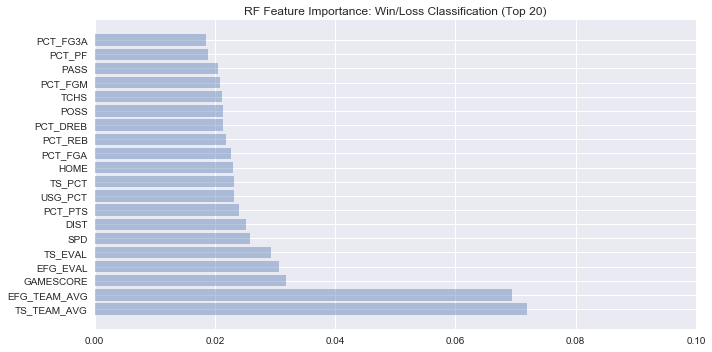

In [188]:
names = df_feature_importance['feature'][:20]

values = df_feature_importance['pct'][:20]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.set_xlim((0,.1))
plt.yticks(yvals,names)
plt.title('RF Feature Importance: Win/Loss Classification (Top 20)')
plt.tight_layout()

plt.savefig('feature_importance_wl_top20.png', dpi=600)

plt.show()

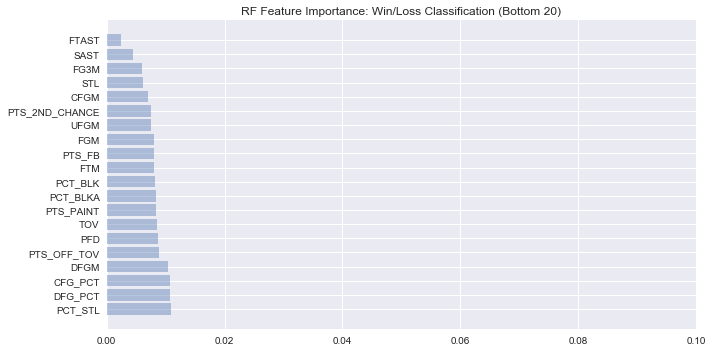

In [189]:
names = df_feature_importance['feature'].tail(20)

values = df_feature_importance['pct'].tail(20)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
ax.set_xlim((0,.1))
plt.yticks(yvals,names)
plt.title('RF Feature Importance: Win/Loss Classification (Bottom 20)')
plt.tight_layout()

plt.savefig('feature_importance_wl_bottom20.png', dpi=600)

plt.show()